In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

<matplotlib.colorbar.Colorbar instance at 0x000000001DAFF5C8>

c:\dev\anaconda\py64bit\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


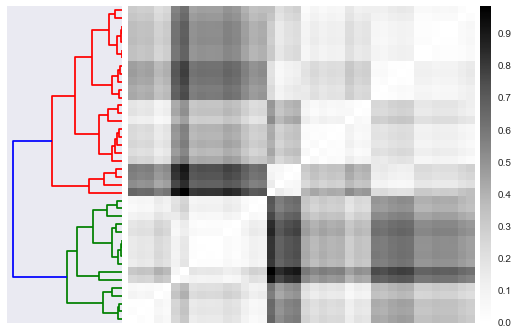

In [2]:
# http://stackoverflow.com/questions/2455761/reordering-matrix-elements-to-reflect-column-and-row-clustering-in-naiive-python/3017704#3017704
import scipy
import scipy.cluster.hierarchy as sch

# Generate features and distance matrix.
x = scipy.rand(40)
D = scipy.zeros([40,40])
for i in range(40):
    for j in range(40):
        D[i,j] = abs(x[i] - x[j])

# Compute and plot dendrogram.
fig = plt.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(D, method='centroid')
Z = sch.dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
D = D[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
plt.colorbar(im, cax=axcolor)

In [4]:
!pip install pydendroheatmap

  Running setup.py bdist_wheel for pydendroheatmap
  Stored in directory: C:\Users\maxim\AppData\Local\pip\Cache\wheels\47\a7\38\bcc174ea20dcba76ee4d3407d470b932e59a9ec99c956c2c98
Successfully built pydendroheatmap


You are using pip version 7.1.2, however version 8.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
import pydendroheatmap as pdh

Here is the source for this example: 

    import numpy as np
    import pyDendroHeatMap as pdh
    import scipy.cluster.hierarchy as sch
    import scipy.spatial.distance as ssd

    #make up some data
    data = np.random.normal(scale = 50,size=(50,50))
    data[0:25,0:25] += 75
    data[25:,25:] = np.random.poisson(lam=50,size=data[25:,25:].shape)
    #cluster the rows
    row_dist = ssd.squareform(ssd.pdist(data))
    row_Z = sch.linkage(row_dist)
    row_idxing = sch.leaves_list(row_Z)

    row_labels = 50 * ['blah']

    #cluster the columns
    col_dist = ssd.squareform(ssd.pdist(data.T))
    col_Z = sch.linkage(col_dist)
    col_idxing = sch.leaves_list(col_Z)
    #make the dendrogram

    col_labels = 50 * ['blah']

    data = data[:,col_idxing][row_idxing,:]

    heatmap = pdh.DendroHeatMap(heat_map_data=data, left_dendrogram=row_Z, top_dendrogram=col_Z)
    heatmap.row_labels = row_labels
    heatmap.col_labels = col_labels
    heatmap.title = 'An example heatmap'
    heatma

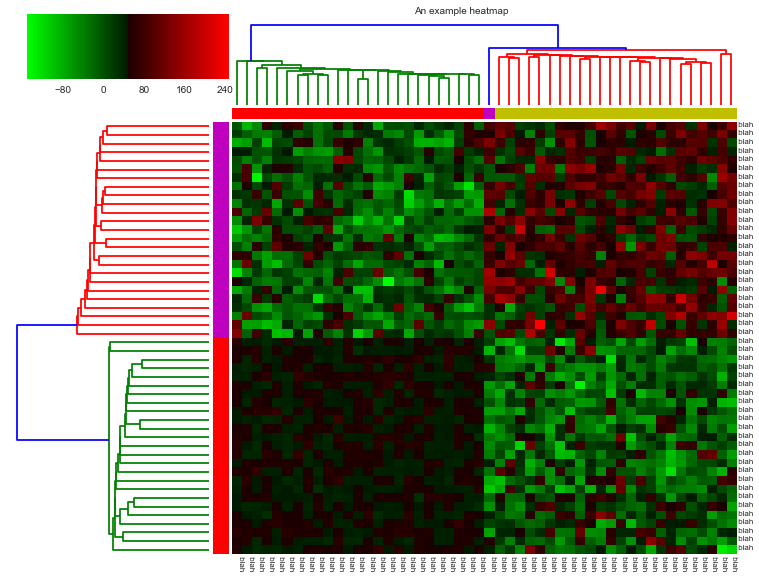

In [7]:
from pydendroheatmap import example
example.run()

In [14]:
data = np.random.normal(scale = 50,size=(50,50))
data[0:25,0:25] += 75
data[25:,25:] = np.random.poisson(lam=50,size=data[25:,25:].shape)

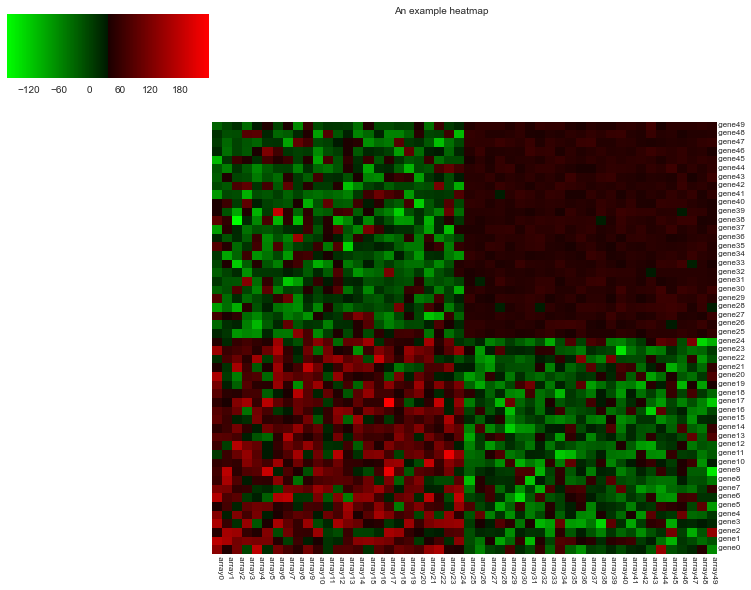

In [22]:
heatmap = pdh.DendroHeatMap(heat_map_data=data)
heatmap.title = 'An example heatmap'
heatmap.row_labels = ['gene%s' % i for i in range(50)]
heatmap.col_labels = ['array%s' % i for i in range(50)]
heatmap.show()

Looks like data row 0 is bottom row in the plot. Confirming:

In [23]:
data2 = np.copy(data)
data2[0, :] += 500

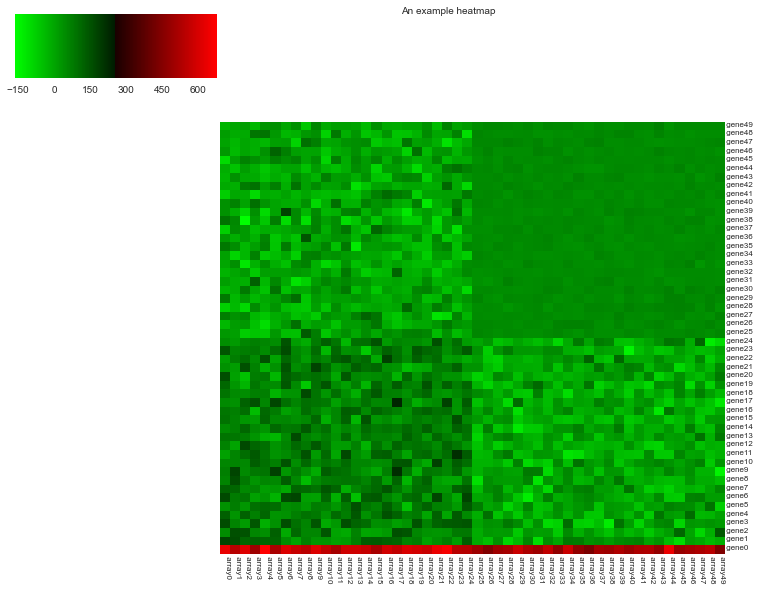

In [24]:
heatmap = pdh.DendroHeatMap(heat_map_data=data2)
heatmap.title = 'An example heatmap'
heatmap.row_labels = ['gene%s' % i for i in range(50)]
heatmap.col_labels = ['array%s' % i for i in range(50)]
heatmap.show()

Confirming that data column 0 is left-most column in the plot:

In [25]:
data3 = np.copy(data)
data3[:, 0] += 500

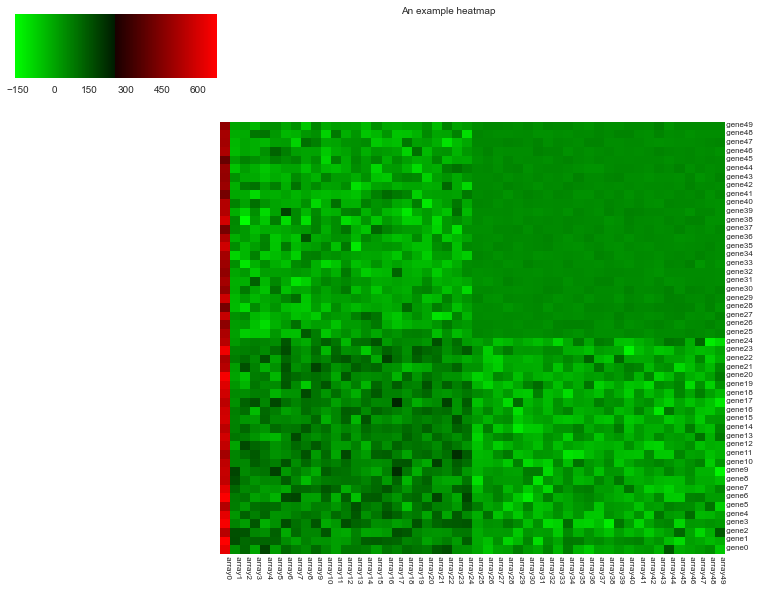

In [26]:
heatmap = pdh.DendroHeatMap(heat_map_data=data3)
heatmap.title = 'An example heatmap'
heatmap.row_labels = ['gene%s' % i for i in range(50)]
heatmap.col_labels = ['array%s' % i for i in range(50)]
heatmap.show()